# Scraping the list of books based on Genres from Goodreads

## Introduction  


Goodreads is an American social cataloging website and a subsidiary of Amazon that allows individuals to search its database of books, annotations, quotes, and reviews. Users can sign up and register books to generate library catalogs and reading lists. They can also create their own groups of book suggestions, surveys, polls, blogs, and discussions.

In [1]:
# importing all requried libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd

**Fetching HTML content from the website**

In [2]:
base_url= "https://www.goodreads.com"
good_reads_genre_list = "https://www.goodreads.com/list"
data = requests.get(good_reads_genre_list).text
soup = BeautifulSoup(data,"lxml")
print(soup.prettify())                    

<!DOCTYPE html>
<html class="desktop withSiteHeaderTopFullImage">
 <head>
  <title>
   listopia
  </title>
  <meta content="Lists of books that members vote on: Books That Everyone Should Read At Least Once, Best Young Adult Books, Books That Should Be Made Into Movies, and Be..." name="description"/>
  <meta content="telephone=no" name="format-detection"/>
  <!-- * Copied from https://info.analytics.a2z.com/#/docs/data_collection/csa/onboard */ -->
  <script>
   //<![CDATA[
    !function(){function n(n,t){var r=i(n);return t&&(r=r("instance",t)),r}var r=[],c=0,i=function(t){return function(){var n=c++;return r.push([t,[].slice.call(arguments,0),n,{time:Date.now()}]),i(n)}};n._s=r,this.csa=n}();
    
    if (window.csa) {
      window.csa("Config", {
        "Application": "GoodreadsMonolith",
        "Events.SushiEndpoint": "https://unagi.amazon.com/1/events/com.amazon.csm.csa.prod",
        "Events.Namespace": "csa",
        "CacheDetection.RequestID": "87CD0CVXM7Q6JCG65ZG2",
       

#### Function to scrap all the genre's and their respective url's from the website. This function returns a dictionary with genre name as key and genre url as genre website link

In [3]:
def genre_names():
    genre_details = {}
    soup1 = soup.find_all("ul", class_ = "listTagsTwoColumn")
    for s1 in soup1:
        genre_names = s1.find_all("a", class_ = "actionLinkLite")
        for genre in genre_names:
            name = genre.text
            url = base_url +genre["href"]
            genre_details[name] = url
    
    return genre_details

##### Passing dictionary "genre_names" to create a data frame

In [4]:
genre_details = genre_names()
genre_df = pd.DataFrame(list(genre_details.items()), columns = ["genre","genre_url"])
genre_df

,genre,genre_url
0,romance,https://www.goodreads.com/list/tag/romance
1,fiction,https://www.goodreads.com/list/tag/fiction
2,young-adult,https://www.goodreads.com/list/tag/young-adult
3,fantasy,https://www.goodreads.com/list/tag/fantasy
4,science-fiction,https://www.goodreads.com/list/tag/science-fic...
5,non-fiction,https://www.goodreads.com/list/tag/non-fiction
6,children,https://www.goodreads.com/list/tag/children
7,history,https://www.goodreads.com/list/tag/history
8,mystery,https://www.goodreads.com/list/tag/mystery
9,covers,https://www.goodreads.com/list/tag/covers


#### Function to scrap book categories details
##### 1.Each genre has multiple book categories.
##### 2.From the particular genre url getting the book categories types, no. of books and no. of voters

In [5]:
def genre_books_categories():
    
    genre_name_list = []
    book_category_list = [] 
    book_category_url_list = []
    books_votes_list = []
    
    for genre, genre_link in genre_details.items():
        data = requests.get(genre_link).text
        soup = BeautifulSoup(data, "lxml")
        book_lists = soup.find_all("a", class_ = "listTitle")  # Scraping all the book category types from the respective genre's url
        
        for book_list in book_lists:
            book_category = book_list.text
            link = book_list["href"]
            book_category_url = base_url+link
            genre_name_list.append(genre)                      # appedning genre name to a list  
            book_category_list.append(book_category)           # appedning book category types to a list
            book_category_url_list.append(book_category_url)   # appending book category types urls's to a list
            
        books_voters = soup.find_all("div",class_ ="listFullDetails") 
        for book_vote in books_voters:
            votes = book_vote.text.strip().split("—")
            vote = ",".join(votes)
            books_votes_list.append(vote)                     # creating a list of books voting details
    genre_books_category_dict = {'genre' : genre_name_list, 'book_category' : book_category_list, 'book_votes' : books_votes_list,
                                 'book_category_url' : book_category_url_list }
    return genre_books_category_dict     

##### Passing the dictionary "genre_books_category_dict"  to create a data frame

In [6]:
genre_books_category_dict  = genre_books_categories() 
genre_books_category_df = pd.DataFrame(genre_books_category_dict)
genre_books_category_df 

,genre,book_category,book_votes,book_category_url
0,romance,Best Book Boyfriends,"9,989 books\n ,\n 28,521 voters",https://www.goodreads.com/list/show/10762.Best...
1,romance,Best Paranormal Romance Series,"1,354 books\n ,\n 13,533 voters",https://www.goodreads.com/list/show/397.Best_P...
2,romance,All Time Favorite Romance Novels,"5,292 books\n ,\n 12,584 voters",https://www.goodreads.com/list/show/12362.All_...
3,romance,Best M/F Erotic Romance like Fifty Shades of G...,"3,216 books\n ,\n 10,196 voters",https://www.goodreads.com/list/show/18698.Best...
4,romance,Best Paranormal & Fantasy Romances,"5,247 books\n ,\n 10,030 voters",https://www.goodreads.com/list/show/225.Best_P...
...,...,...,...,...
865,title-challenge,Frosty Book Titles,"1,340 books\n ,\n 145 voters",https://www.goodreads.com/list/show/16774.Fros...
866,title-challenge,Titles of Only One Syllable,"857 books\n ,\n 138 voters",https://www.goodreads.com/list/show/4653.Title...
867,title-challenge,Kin,"1,699 books\n ,\n 134 voters",https://www.goodreads.com/list/show/3522.Kin
868,title-challenge,The Female Relative Phenomenon,"391 books\n ,\n 131 voters",https://www.goodreads.com/list/show/3705.The_F...


##### Extracting number of books and number of voters into two separate columns

In [7]:
genre_books_category_df['book_votes']= genre_books_category_df['book_votes'].str.replace("\n    ,\n"," and")  # replacing "\n    ,\n" with and
genre_books_category_df[['no_of_books','no_of_voters']]= genre_books_category_df['book_votes'].str.split("and", expand= True) # creating separate column
book_category_details = genre_books_category_df[['genre','book_category','no_of_books','no_of_voters','book_category_url']] # sorting columns in df
book_category_details

,genre,book_category,no_of_books,no_of_voters,book_category_url
0,romance,Best Book Boyfriends,"9,989 books","28,521 voters",https://www.goodreads.com/list/show/10762.Best...
1,romance,Best Paranormal Romance Series,"1,354 books","13,533 voters",https://www.goodreads.com/list/show/397.Best_P...
2,romance,All Time Favorite Romance Novels,"5,292 books","12,584 voters",https://www.goodreads.com/list/show/12362.All_...
3,romance,Best M/F Erotic Romance like Fifty Shades of G...,"3,216 books","10,196 voters",https://www.goodreads.com/list/show/18698.Best...
4,romance,Best Paranormal & Fantasy Romances,"5,247 books","10,030 voters",https://www.goodreads.com/list/show/225.Best_P...
...,...,...,...,...,...
865,title-challenge,Frosty Book Titles,"1,340 books",145 voters,https://www.goodreads.com/list/show/16774.Fros...
866,title-challenge,Titles of Only One Syllable,857 books,138 voters,https://www.goodreads.com/list/show/4653.Title...
867,title-challenge,Kin,"1,699 books",134 voters,https://www.goodreads.com/list/show/3522.Kin
868,title-challenge,The Female Relative Phenomenon,391 books,131 voters,https://www.goodreads.com/list/show/3705.The_F...


##### Removing unwanted text in the no_of_books and no_of_voters columns

In [8]:
book_category_details['total_books'] = book_category_details['no_of_books'].str.replace('[a-z]*','',regex = True)
book_category_details['total_voters'] = book_category_details['no_of_voters'].str.replace('[a-z]*','',regex = True)
book_category_details = book_category_details[['genre','book_category','total_books','total_voters','book_category_url']] # rearranging columns
book_category_details

,genre,book_category,total_books,total_voters,book_category_url
0,romance,Best Book Boyfriends,"9,989","28,521",https://www.goodreads.com/list/show/10762.Best...
1,romance,Best Paranormal Romance Series,"1,354","13,533",https://www.goodreads.com/list/show/397.Best_P...
2,romance,All Time Favorite Romance Novels,"5,292","12,584",https://www.goodreads.com/list/show/12362.All_...
3,romance,Best M/F Erotic Romance like Fifty Shades of G...,"3,216","10,196",https://www.goodreads.com/list/show/18698.Best...
4,romance,Best Paranormal & Fantasy Romances,"5,247","10,030",https://www.goodreads.com/list/show/225.Best_P...
...,...,...,...,...,...
865,title-challenge,Frosty Book Titles,"1,340",145,https://www.goodreads.com/list/show/16774.Fros...
866,title-challenge,Titles of Only One Syllable,857,138,https://www.goodreads.com/list/show/4653.Title...
867,title-challenge,Kin,"1,699",134,https://www.goodreads.com/list/show/3522.Kin
868,title-challenge,The Female Relative Phenomenon,391,131,https://www.goodreads.com/list/show/3705.The_F...


#### Lets fetch each book details from the romace genre, from any one of the book category 


#### Romance genre data 

In [9]:
romance_df  = book_category_details[book_category_details['genre'] == 'romance']  # creating a new data frame with all records from romance genre
romance_df

,genre,book_category,total_books,total_voters,book_category_url
0,romance,Best Book Boyfriends,"9,989","28,521",https://www.goodreads.com/list/show/10762.Best...
1,romance,Best Paranormal Romance Series,"1,354","13,533",https://www.goodreads.com/list/show/397.Best_P...
2,romance,All Time Favorite Romance Novels,"5,292","12,584",https://www.goodreads.com/list/show/12362.All_...
3,romance,Best M/F Erotic Romance like Fifty Shades of G...,"3,216","10,196",https://www.goodreads.com/list/show/18698.Best...
4,romance,Best Paranormal & Fantasy Romances,"5,247","10,030",https://www.goodreads.com/list/show/225.Best_P...
5,romance,"Best ADULT Urban Fantasy, Fantasy and Paranorm...","4,179","9,910",https://www.goodreads.com/list/show/9088.Best_...
6,romance,Best Love Stories,"5,038","9,694",https://www.goodreads.com/list/show/550.Best_L...
7,romance,Young Adult Romance,"3,849","9,517",https://www.goodreads.com/list/show/1333.Young...
8,romance,College Romance,"1,578","8,608",https://www.goodreads.com/list/show/12066.Coll...
9,romance,Best Ever Contemporary Romance Books,"4,601","8,548",https://www.goodreads.com/list/show/57.Best_Ev...


##### Choosing one book category: "All Time Favorite Romance Novels" to fetch books details from that category

In [10]:
romance_novels = romance_df[romance_df['book_category']== "All Time Favorite Romance Novels"] # creating a data frame with one book category details
romance_novels

,genre,book_category,total_books,total_voters,book_category_url
2,romance,All Time Favorite Romance Novels,"5,292","12,584",https://www.goodreads.com/list/show/12362.All_...


In [11]:
romance_novels_url = romance_novels['book_category_url'].iloc[0]          # fetching the url from the data frame
romance_novels_url                                                        # storing the "All Time Favorite Romance Novels" book_category_url 

'https://www.goodreads.com/list/show/12362.All_Time_Favorite_Romance_Novels'

#### Functions to scrap book details

In [12]:
# Function to scrap book title and url and storing them in their recpective list. This function return the title and url lists.
def title_url(page):
    books_titles_list = []
    books_urls_list = []
    books_description_list = []
    books_titles_urls = page.find_all("a", class_ = "bookTitle")
    num = 0
    for book_title_url in books_titles_urls:
        num += 1
        title = book_title_url.text.strip()
        url = base_url + book_title_url["href"]
        # desc  = descriptions(url) 
        books_titles_list.append(title)                        # appending books title to a list
        books_urls_list.append(url)                            # appending books url to a list
        # books_description_list.append(desc)
        # if num == 1:
        #     break
    return books_titles_list,books_urls_list,


# Function to scrap author's name and store them in a list. This function will return the authors list.
def authors(page):
    books_authors_list = []
    books_authors = page.find_all("a", class_ = "authorName")
    num = 0
    for book_author in books_authors:
        num += 1
        author = book_author.text
        books_authors_list.append(author)                 # appending books author's names to a list
        # if num == 1:
        #     break
    return books_authors_list 


# Function to scarp books ratings and store them in a list. This function will return the rating list.
def ratings(page):
    books_ratings_list = []
    books_ratings = page.find_all("span", class_ = "minirating")
    num = 0
    for book_rating in books_ratings:
        num += 1
        rating = book_rating.text
        books_ratings_list.append(rating)              # appending books ratings details to a list
        # if num == 1:
        #     break
    return books_ratings_list  


# Function to create a dictionary with all the scraped data. This function will return the dictionary created will the title,url,author,ratings lists.
def books_details(link):
    data = requests.get(link).text
    soup = BeautifulSoup(data,"lxml")
    page = soup.find("table", class_ = "tableList js-dataTooltip")
    title,url =title_url(page) 
    author = authors(page)
    rating = ratings(page)
    books_details_dict ={ "title" : title ,"author" : author, "books_ratings" : rating,"url": url}
    return books_details_dict

##### Passing the dictionary "books_details_dict" to create a data frame

In [13]:
books_details_new = books_details(romance_novels_url)  # calling function to fecth the dictionay with all the book details
df = pd.DataFrame(books_details_new)                   
df

,title,author,books_ratings,url
0,Pride and Prejudice,Jane Austen,"4.28 avg rating — 4,102,282 ratings",https://www.goodreads.com/book/show/1885.Pride...
1,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,"3.66 avg rating — 2,509,300 ratings",https://www.goodreads.com/book/show/10818853-f...
2,"Beautiful Disaster (Beautiful, #1)",Jamie McGuire,"4.02 avg rating — 669,494 ratings",https://www.goodreads.com/book/show/11505797-b...
3,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,"3.64 avg rating — 6,340,889 ratings",https://www.goodreads.com/book/show/41865.Twil...
4,"The Notebook (The Notebook, #1)",Nicholas Sparks,"4.14 avg rating — 1,636,477 ratings",https://www.goodreads.com/book/show/33648131-t...
...,...,...,...,...
95,Practice Makes Perfect,Julie James,"3.95 avg rating — 31,552 ratings",https://www.goodreads.com/book/show/5082599-pr...
96,The Boy Who Sneaks in My Bedroom Window (The B...,Kirsty Moseley,"3.85 avg rating — 75,634 ratings",https://www.goodreads.com/book/show/13628209-t...
97,"Delirium (Delirium, #1)",Lauren Oliver,"3.95 avg rating — 462,079 ratings",https://www.goodreads.com/book/show/11614718-d...
98,"The Darkest Night (Lords of the Underworld, #1)",Gena Showalter,"4.05 avg rating — 83,769 ratings",https://www.goodreads.com/book/show/476543.The...


#### Function to Create respective columns for avgerage rating and number of ratings given for a book

In [14]:
def split_books_ratings(df):
    df[['average_rating','number_of_ratings']] = df['books_ratings'].str.split(' — ', expand = True)
    return df

df =split_books_ratings(df)
df

,title,author,books_ratings,url,average_rating,number_of_ratings
0,Pride and Prejudice,Jane Austen,"4.28 avg rating — 4,102,282 ratings",https://www.goodreads.com/book/show/1885.Pride...,4.28 avg rating,"4,102,282 ratings"
1,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,"3.66 avg rating — 2,509,300 ratings",https://www.goodreads.com/book/show/10818853-f...,3.66 avg rating,"2,509,300 ratings"
2,"Beautiful Disaster (Beautiful, #1)",Jamie McGuire,"4.02 avg rating — 669,494 ratings",https://www.goodreads.com/book/show/11505797-b...,4.02 avg rating,"669,494 ratings"
3,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,"3.64 avg rating — 6,340,889 ratings",https://www.goodreads.com/book/show/41865.Twil...,3.64 avg rating,"6,340,889 ratings"
4,"The Notebook (The Notebook, #1)",Nicholas Sparks,"4.14 avg rating — 1,636,477 ratings",https://www.goodreads.com/book/show/33648131-t...,4.14 avg rating,"1,636,477 ratings"
...,...,...,...,...,...,...
95,Practice Makes Perfect,Julie James,"3.95 avg rating — 31,552 ratings",https://www.goodreads.com/book/show/5082599-pr...,3.95 avg rating,"31,552 ratings"
96,The Boy Who Sneaks in My Bedroom Window (The B...,Kirsty Moseley,"3.85 avg rating — 75,634 ratings",https://www.goodreads.com/book/show/13628209-t...,3.85 avg rating,"75,634 ratings"
97,"Delirium (Delirium, #1)",Lauren Oliver,"3.95 avg rating — 462,079 ratings",https://www.goodreads.com/book/show/11614718-d...,3.95 avg rating,"462,079 ratings"
98,"The Darkest Night (Lords of the Underworld, #1)",Gena Showalter,"4.05 avg rating — 83,769 ratings",https://www.goodreads.com/book/show/476543.The...,4.05 avg rating,"83,769 ratings"


#### Function to remove unwanted text from avg_rating and no_of_ratings columns

In [15]:
def remove_unwanted_data(df):
    df['avg_rating'] = df['average_rating'].str.replace('[a-z]*','',regex= True)
    df['no_of_ratings'] = df['number_of_ratings'].str.replace('[a-z]*','',regex = True)
    df = df[['title','author','avg_rating','no_of_ratings', 'url']]
    return df
    
df  = remove_unwanted_data(df)
df

,title,author,avg_rating,no_of_ratings,url
0,Pride and Prejudice,Jane Austen,4.28,"4,102,282",https://www.goodreads.com/book/show/1885.Pride...
1,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,3.66,"2,509,300",https://www.goodreads.com/book/show/10818853-f...
2,"Beautiful Disaster (Beautiful, #1)",Jamie McGuire,4.02,"669,494",https://www.goodreads.com/book/show/11505797-b...
3,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.64,"6,340,889",https://www.goodreads.com/book/show/41865.Twil...
4,"The Notebook (The Notebook, #1)",Nicholas Sparks,4.14,"1,636,477",https://www.goodreads.com/book/show/33648131-t...
...,...,...,...,...,...
95,Practice Makes Perfect,Julie James,3.95,"31,552",https://www.goodreads.com/book/show/5082599-pr...
96,The Boy Who Sneaks in My Bedroom Window (The B...,Kirsty Moseley,3.85,"75,634",https://www.goodreads.com/book/show/13628209-t...
97,"Delirium (Delirium, #1)",Lauren Oliver,3.95,"462,079",https://www.goodreads.com/book/show/11614718-d...
98,"The Darkest Night (Lords of the Underworld, #1)",Gena Showalter,4.05,"83,769",https://www.goodreads.com/book/show/476543.The...


#### Function to scrap all books description from books url's and storing it in a list.

In [16]:
def book_description_fxn(df_column):
    book_description = []
    for url in df_column:
        
        data = requests.get(url).text
        soup =BeautifulSoup(data,'lxml')
        desc = soup.find("span", class_ = "Formatted")
        description = desc.text
        book_description.append(description)
        
    
    return(book_description)


book_description = book_description_fxn(df["url"])
print(book_description)

['Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work "her own darling child" and its vivacious heroine, Elizabeth Bennet, "as delightful a creature as ever appeared in print." The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen\'s radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book the most superb comedy of manners of Regency England.Alternate cover edition of ISBN 9780679783268', 'When literature student Anastasia Steele goes to interview young entrepreneur Christian Grey, she encounters a man who is beautiful, brilliant, and intimidating. The unworldly, innocent Ana is startled to realize she wants this man and, despite his enigmatic reserve, finds she is desperate to get close to him. Unable to resist Ana’s quiet beau

##### Adding the description column to the data frame. Every book will have its own correct description.

In [17]:
df.loc[ : ,'description'] = book_description
df

C:\Users\kushw\AppData\Local\Temp\ipykernel_12904\1717985286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[ : ,'description'] = book_description


,title,author,avg_rating,no_of_ratings,url,description
0,Pride and Prejudice,Jane Austen,4.28,"4,102,282",https://www.goodreads.com/book/show/1885.Pride...,"Since its immediate success in 1813, Pride and..."
1,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,3.66,"2,509,300",https://www.goodreads.com/book/show/10818853-f...,When literature student Anastasia Steele goes ...
2,"Beautiful Disaster (Beautiful, #1)",Jamie McGuire,4.02,"669,494",https://www.goodreads.com/book/show/11505797-b...,The new Abby Abernathy is a good girl. She doe...
3,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.64,"6,340,889",https://www.goodreads.com/book/show/41865.Twil...,About three things I was absolutely positive.F...
4,"The Notebook (The Notebook, #1)",Nicholas Sparks,4.14,"1,636,477",https://www.goodreads.com/book/show/33648131-t...,Set amid the austere beauty of the North Carol...
...,...,...,...,...,...,...
95,Practice Makes Perfect,Julie James,3.95,"31,552",https://www.goodreads.com/book/show/5082599-pr...,"Behind closed doors, they're laying down the l..."
96,The Boy Who Sneaks in My Bedroom Window (The B...,Kirsty Moseley,3.85,"75,634",https://www.goodreads.com/book/show/13628209-t...,"Liam James, boy next door and total douchebag,..."
97,"Delirium (Delirium, #1)",Lauren Oliver,3.95,"462,079",https://www.goodreads.com/book/show/11614718-d...,There is an alternate cover edition for this I...
98,"The Darkest Night (Lords of the Underworld, #1)",Gena Showalter,4.05,"83,769",https://www.goodreads.com/book/show/476543.The...,\nHis powers—Inhuman...His passion—Beyond immo...


#### Cross checking whethre the books details that are showing are correct or not.  
Fetching one random row details and checking whether those details are matching with the website data or not

In [18]:
print(df.iloc[11])


title                             Easy (Contours of the Heart, #1)
author                                              Tammara Webber
avg_rating                                                  4.08  
no_of_ratings                                             226,766 
url              https://www.goodreads.com/book/show/16056408-easy
description      A New York Times and USA Today BestsellerRescu...
Name: 11, dtype: object


**Above are the details from the data frame which we scraped**  
**Below are the book details from the website**  
**The details from the website are matching details from our dataframe**  

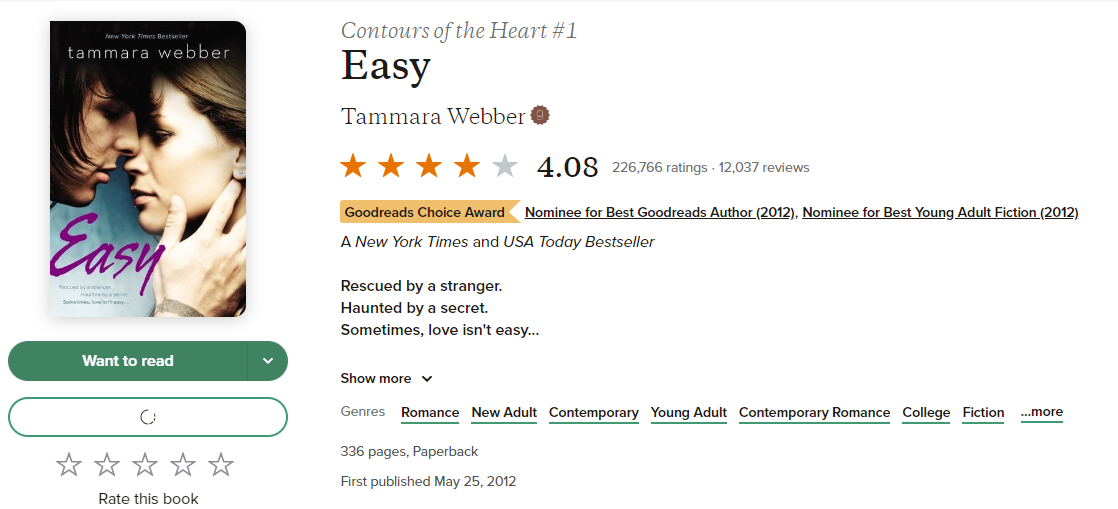

### Let us scrape books details from multiple pages.   
##### Scraping data from first 3 pages
1.Each page has 100 books details, we will scrap the first three pages from the romance_novels_url, so that we will have 300 books details  
2.Book category url is stored in romance_novels_url variable  
3.We are using the page extension url that is used to access the respective page. 
"https://www.goodreads.com/list/show/17225.Great_Romance_Novels?page=2"  
If we add "?page=2" to the base url of that category we can go to second page. Like wise we can do for any other pages.  
4.All the data fetched from each page is stored in the respective dictionary returned by the function books_details().  
5.All dictionaries that are added into the list named dict-list.

In [19]:
link = romance_novels_url
# next page url additin is "?page=page_number"
dict_list = []
for x in range(1,4):
    next_page_url = f"?page={x}"
    if x ==1:                                        # for first page we are using the respective category base url
        link = romance_novels_url
        books_detail = books_details(link)
        dict_list.append(books_detail)
    if  2<=x<=3:                                    # for any other pages we will add the "next_page_url" to the category base url.    
        link = romance_novels_url + next_page_url
        books_detail = books_details(link)
        dict_list.append(books_detail)   

1.Unpacking the list with dictionaries and creating three data frame from the three dictionaries.  
2.Using concat we are appending all three dataframes so that we can get one data frame which has books details from all three pages

In [20]:
dict1,dict2,dict3 = dict_list
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)
df3 = pd.DataFrame(dict3)

first_3_pages_books = pd.concat([df1,df2,df3],ignore_index= True, axis=0)
first_3_pages_books 

,title,author,books_ratings,url
0,Pride and Prejudice,Jane Austen,"4.28 avg rating — 4,102,282 ratings",https://www.goodreads.com/book/show/1885.Pride...
1,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,"3.66 avg rating — 2,509,300 ratings",https://www.goodreads.com/book/show/10818853-f...
2,"Beautiful Disaster (Beautiful, #1)",Jamie McGuire,"4.02 avg rating — 669,494 ratings",https://www.goodreads.com/book/show/11505797-b...
3,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,"3.64 avg rating — 6,340,917 ratings",https://www.goodreads.com/book/show/41865.Twil...
4,"The Notebook (The Notebook, #1)",Nicholas Sparks,"4.14 avg rating — 1,636,477 ratings",https://www.goodreads.com/book/show/33648131-t...
...,...,...,...,...
295,"Stray (Shifters, #1)",Rachel Vincent,"3.78 avg rating — 36,685 ratings",https://www.goodreads.com/book/show/793399.Stray
296,Unwritten Rules,M.A. Stacie,"3.66 avg rating — 2,816 ratings",https://www.goodreads.com/book/show/10327294-u...
297,Carnal Innocence,Nora Roberts,"3.98 avg rating — 19,933 ratings",https://www.goodreads.com/book/show/59807.Carn...
298,"Naked (The Blackstone Affair, #1)",Raine Miller,"4.01 avg rating — 73,996 ratings",https://www.goodreads.com/book/show/15852756-n...


#### Using the function split_books_ratings(df) to create respective columns for avgerage rating and number of ratings given for a book

In [21]:
first_3_pages_books = split_books_ratings(first_3_pages_books)
first_3_pages_books 

,title,author,books_ratings,url,average_rating,number_of_ratings
0,Pride and Prejudice,Jane Austen,"4.28 avg rating — 4,102,282 ratings",https://www.goodreads.com/book/show/1885.Pride...,4.28 avg rating,"4,102,282 ratings"
1,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,"3.66 avg rating — 2,509,300 ratings",https://www.goodreads.com/book/show/10818853-f...,3.66 avg rating,"2,509,300 ratings"
2,"Beautiful Disaster (Beautiful, #1)",Jamie McGuire,"4.02 avg rating — 669,494 ratings",https://www.goodreads.com/book/show/11505797-b...,4.02 avg rating,"669,494 ratings"
3,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,"3.64 avg rating — 6,340,917 ratings",https://www.goodreads.com/book/show/41865.Twil...,3.64 avg rating,"6,340,917 ratings"
4,"The Notebook (The Notebook, #1)",Nicholas Sparks,"4.14 avg rating — 1,636,477 ratings",https://www.goodreads.com/book/show/33648131-t...,4.14 avg rating,"1,636,477 ratings"
...,...,...,...,...,...,...
295,"Stray (Shifters, #1)",Rachel Vincent,"3.78 avg rating — 36,685 ratings",https://www.goodreads.com/book/show/793399.Stray,3.78 avg rating,"36,685 ratings"
296,Unwritten Rules,M.A. Stacie,"3.66 avg rating — 2,816 ratings",https://www.goodreads.com/book/show/10327294-u...,3.66 avg rating,"2,816 ratings"
297,Carnal Innocence,Nora Roberts,"3.98 avg rating — 19,933 ratings",https://www.goodreads.com/book/show/59807.Carn...,3.98 avg rating,"19,933 ratings"
298,"Naked (The Blackstone Affair, #1)",Raine Miller,"4.01 avg rating — 73,996 ratings",https://www.goodreads.com/book/show/15852756-n...,4.01 avg rating,"73,996 ratings"


#### Using the function remove_unwanted_data to remove unwanted text from avg_rating and no_of_ratings columns

In [22]:
first_3_pages_books  = remove_unwanted_data(first_3_pages_books)
first_3_pages_books 

,title,author,avg_rating,no_of_ratings,url
0,Pride and Prejudice,Jane Austen,4.28,"4,102,282",https://www.goodreads.com/book/show/1885.Pride...
1,"Fifty Shades of Grey (Fifty Shades, #1)",E.L. James,3.66,"2,509,300",https://www.goodreads.com/book/show/10818853-f...
2,"Beautiful Disaster (Beautiful, #1)",Jamie McGuire,4.02,"669,494",https://www.goodreads.com/book/show/11505797-b...
3,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.64,"6,340,917",https://www.goodreads.com/book/show/41865.Twil...
4,"The Notebook (The Notebook, #1)",Nicholas Sparks,4.14,"1,636,477",https://www.goodreads.com/book/show/33648131-t...
...,...,...,...,...,...
295,"Stray (Shifters, #1)",Rachel Vincent,3.78,"36,685",https://www.goodreads.com/book/show/793399.Stray
296,Unwritten Rules,M.A. Stacie,3.66,"2,816",https://www.goodreads.com/book/show/10327294-u...
297,Carnal Innocence,Nora Roberts,3.98,"19,933",https://www.goodreads.com/book/show/59807.Carn...
298,"Naked (The Blackstone Affair, #1)",Raine Miller,4.01,"73,996",https://www.goodreads.com/book/show/15852756-n...


#### Cross checking whethre the books details that are showing are correct or not.  
Fetching one random row details and checking whether those details are matching with the website data or not

In [23]:
first_3_pages_books.loc[257]

title                    The Flame and the Flower (Birmingham, #1)
author                                       Kathleen E. Woodiwiss
avg_rating                                                  4.04  
no_of_ratings                                              18,968 
url              https://www.goodreads.com/book/show/896623.The...
Name: 257, dtype: object

**Above are the details from the data frame which we scraped**  
**Below are the book details from the website**  
**The details from the website are matching details from dataframe**

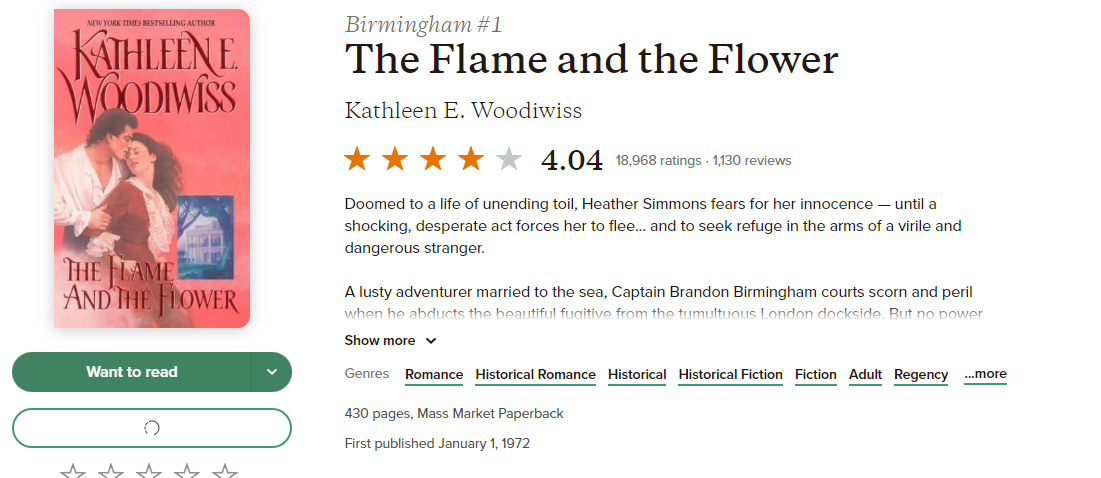